# Linear Regression Implementation

## Purpose

To implement (and visualize) a linear regresssion model in PyTorch 

##Creating the dataset

In [0]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

tensor([[ 6.1824e-01],
        [-2.9490e+01],
        [ 3.3207e+00],
        [ 1.6490e+00],
        [-3.5810e+00],
        [ 3.2700e+00],
        [-1.1313e+01],
        [-1.6633e+00],
        [ 2.6608e+00],
        [-2.9109e+00],
        [ 2.1619e+00],
        [ 4.9500e+00],
        [-2.1996e+01],
        [ 6.4999e+00],
        [-6.6721e+00],
        [-1.1667e+01],
        [ 4.1011e+00],
        [-1.7329e+01],
        [ 9.2061e+00],
        [ 9.1558e-01],
        [-4.4651e+00],
        [-1.9201e+01],
        [-3.1398e+00],
        [ 3.0226e+00],
        [ 1.0092e+01],
        [ 1.7846e+01],
        [ 1.1693e+01],
        [-1.0001e+01],
        [ 1.7309e+01],
        [ 1.1269e+01],
        [-7.9248e-03],
        [ 6.6296e-01],
        [ 8.2511e+00],
        [ 7.0179e+00],
        [ 5.3530e+00],
        [ 6.9492e+00],
        [ 6.3957e+00],
        [ 9.8325e+00],
        [ 1.4949e+00],
        [ 1.4204e+01],
        [-7.8355e+00],
        [-8.8773e+00],
        [-1.2631e+00],
        [ 6

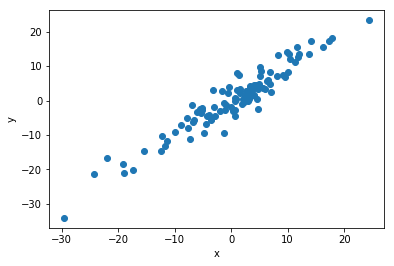

In [0]:
X = torch.randn(100, 1)*10
y = X + 3*torch.randn(100, 1)
plt.plot(X.numpy(), y.numpy(), 'o')
plt.ylabel('y')
plt.xlabel('x')
print(X)
print(y)

##Creating the model

In [0]:
class LR(nn.Module):
  def __init__(self, input_size, output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, output_size)
    
  def forward(self, x):
    pred = self.linear(x)
    return pred

In [0]:
torch.manual_seed(1)
model = LR(1,1)
print(model)

LR(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


##Plotting the intial results

In [0]:
def get_params():
  [w,b] = model.parameters()
  return (w[0][0].item(), b[0].item())

In [0]:
def plot_fit(title):
  plt.title = title
  w1, b1 = get_params()
  x1 = np.array([-30, 30])
  y1 = w1*x1 + b1
  plt.plot(x1, y1, 'r') # our prediction line is in red
  plt.scatter(X, y) # plot the dataset in blue (default is blue)
  plt.show()
  

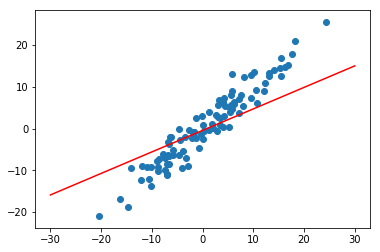

In [0]:
plot_fit("Initial model")

##Training the model:

In [0]:
criterion = nn.MSELoss() #define loss function
optimizer = torch.optim.SGD(model.parameters(), lr = 0.001) #define optimizer

In [0]:
epochs = 100 #we aren't too concerned about overfitting in this problem, so we can use a larger amount of epochs than neccessary
losses = []
for i in range(epochs):
  y_pred = model.forward(X)
  loss = criterion(y_pred, y)
  print("epoch:", i, "loss:", loss.item())
  
  losses.append(loss.item())
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

epoch: 0 loss: 24.576587677001953
epoch: 1 loss: 19.539480209350586
epoch: 2 loss: 15.928174018859863
epoch: 3 loss: 13.3390474319458
epoch: 4 loss: 11.482733726501465
epoch: 5 loss: 10.151786804199219
epoch: 6 loss: 9.197482109069824
epoch: 7 loss: 8.513197898864746
epoch: 8 loss: 8.022496223449707
epoch: 9 loss: 7.670576572418213
epoch: 10 loss: 7.41815185546875
epoch: 11 loss: 7.237057209014893
epoch: 12 loss: 7.1071014404296875
epoch: 13 loss: 7.0138068199157715
epoch: 14 loss: 6.946796417236328
epoch: 15 loss: 6.898630142211914
epoch: 16 loss: 6.863974094390869
epoch: 17 loss: 6.8390045166015625
epoch: 18 loss: 6.82097864151001
epoch: 19 loss: 6.807932376861572
epoch: 20 loss: 6.798455715179443
epoch: 21 loss: 6.791539669036865
epoch: 22 loss: 6.786458969116211
epoch: 23 loss: 6.7826948165893555
epoch: 24 loss: 6.779874801635742
epoch: 25 loss: 6.7777323722839355
epoch: 26 loss: 6.776076793670654
epoch: 27 loss: 6.774769306182861
epoch: 28 loss: 6.773713111877441
epoch: 29 loss: 6

Text(0.5, 0, 'Epoch')

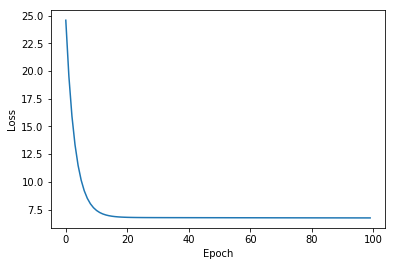

In [0]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

##Plotting the final results

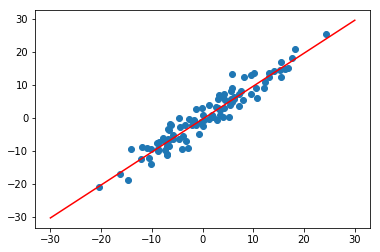

In [0]:
plot_fit("Trained model")